# Usage 

Input the directory of the .csv in the cell below. It is assumed that the .csv is cleaned and has already had data that is Synthesized. Once that is done you can Run all.

What this ipynb does: 
1. Read in the data
2. Sets all 0s in cholestrol as NaN 
3. If Sex starts with "M" set's that to be 1. This means "Male" is 1, "Female" is 0. 
4. Sets Result to 1 for values above 0. This is because one data sets uses the values from 1-4 to identify the extent of heart disease
5. Remove all rows with NaN in them 
6. Runs the Support Vector Classifier, the Random Forest, and then the K nearest neighbors
7. Generates plots of the confusion matrix

In [1]:
import pandas as pd
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import glob

df = pd.read_csv('./Synthesized Data/No_Sythesize.csv') # ENTER FILE NAME HERE


In [2]:
# Variables we are using 

xy_list = ['Age', 'Sex', 'Systolic BP', 'Cholesterol', 'Fasting Blood Sugar', 'Max Heart Rate']
x_list = ['Age', 'Sex', 'Systolic BP', 'Fasting Blood Sugar', 'Max Heart Rate', 'Cholesterol']
y_list = ['Result']

In [3]:
df = df[x_list + y_list]
# Little bit of data cleaning
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)
# Accounting for datasets which give a range of heart disease. 
df['Result'] = df['Result'].apply(lambda x: 1 if x != 0 else 0)
try: 
    df['Sex'] = df['Sex'].apply(lambda x: 1 if x.startswith == 'M' else 0)
except AttributeError:
    pass
df.dropna(inplace = True)
df

,Age,Sex,Systolic BP,Fasting Blood Sugar,Max Heart Rate,Cholesterol,Result
0,39,0,106.0,0,180.7,195.0,0
1,46,0,121.0,0,175.8,250.0,0
2,48,0,127.5,0,174.4,245.0,0
3,61,0,150.0,0,165.3,225.0,1
4,46,0,130.0,0,175.8,285.0,0
...,...,...,...,...,...,...,...
6181,45,0,110.0,0,132.0,264.0,1
6182,68,0,144.0,1,141.0,193.0,1
6183,57,0,130.0,0,115.0,131.0,1
6184,57,0,130.0,0,174.0,236.0,1


In [4]:
# run a SVM to predict the Result 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df[xy_list]
y = df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.7738287560581584

Text(0.5, 1.0, 'Cholesterol Distribution\nMean: 252.26, Std: 70.19')

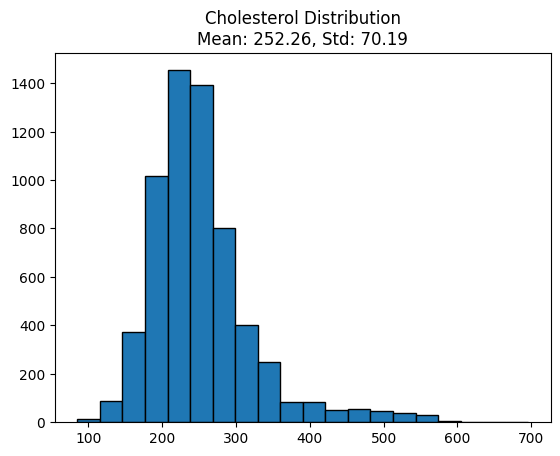

In [5]:
# plot distribution of y 
plt.hist(X['Cholesterol'], bins=20, edgecolor='black')
plt.title("Cholesterol Distribution\nMean: {:.2f}, Std: {:.2f}".format(X['Cholesterol'].mean(), X['Cholesterol'].std()))

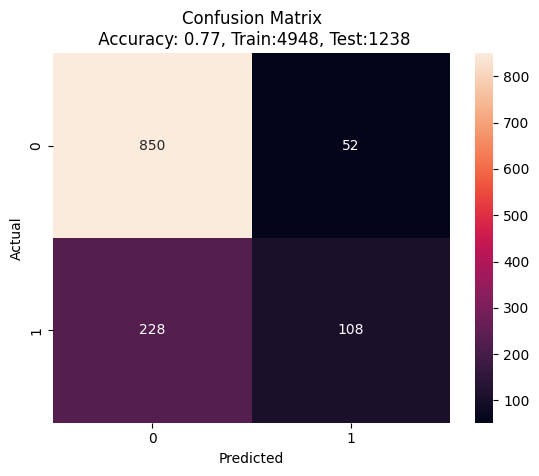

In [6]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')

# add the title to the confusion matrix
plt.title('Confusion Matrix\n Accuracy: {0:.2f}, Train:{1:.0f}, Test:{2:.0f}'.format(accuracy_score(y_test, y_pred), len(X_train), len(X_test) ))
plt.ylabel('Actual')
plt.show()

# check if it is a significant model
from sklearn.model_selection import cross_val_score



In [7]:
a = cross_val_score(clf, X, y, cv=5, scoring='f1')
print(a.mean())

0.3073787686393925


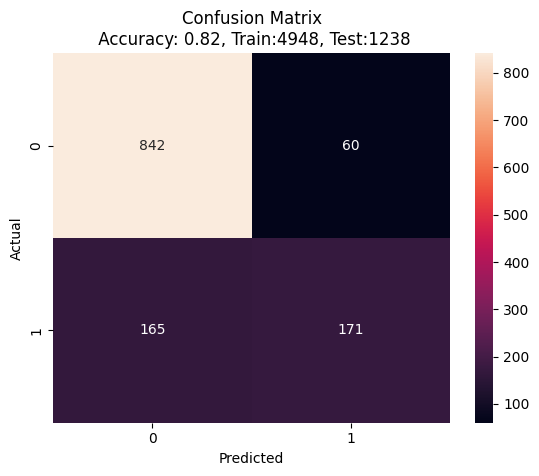

In [8]:
# do the same with a RF model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')

# add the title to the confusion matrix
plt.title('Confusion Matrix\n Accuracy: {0:.2f}, Train:{1:.0f}, Test:{2:.0f}'.format(accuracy_score(y_test, y_pred), len(X_train), len(X_test) ))

plt.ylabel('Actual')

plt.show()


In [9]:
# check if it is a significant model
a = cross_val_score(clf, X, y, cv=5, scoring='f1')
print(a.mean())

0.41047645931231


Text(50.722222222222214, 0.5, 'Actual')

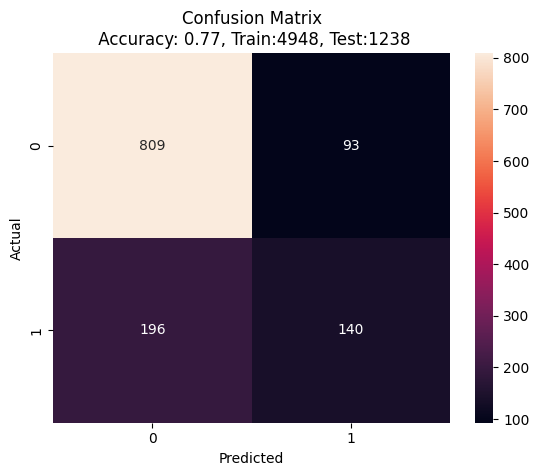

In [10]:
# try with a K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')

# add the title to the confusion matrix
plt.title('Confusion Matrix\n Accuracy: {0:.2f}, Train:{1:.0f}, Test:{2:.0f}'.format(accuracy_score(y_test, y_pred), len(X_train), len(X_test) ))

plt.ylabel('Actual')
 


In [11]:
# get the cross validation score
a = cross_val_score(clf, X, y, cv=5, scoring = 'f1')
print(a.mean())

0.3904478045667583
